In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
print("5")

5


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn import tree

In [3]:
dataset, gnb_acc, tree_acc =[], [], []

# Iris Dataset

### Pre-processing

In [4]:
dataset.append('Iris')

In [6]:
df = pd.read_csv('datasets\Iris.csv')

In [15]:
df.head(200)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.size

900

In [9]:
df.shape

(150, 6)

In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
for i in df.columns:
  print(i)

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species


In [16]:
df.drop(columns = 'Id', inplace = True)

In [18]:
df.replace(to_replace = 'Iris-setosa', value = 0, inplace = True)
df.replace(to_replace =  'Iris-versicolor', value = 1, inplace = True)
df.replace(to_replace = 'Iris-virginica', value = 2, inplace = True)

In [19]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [21]:
X = pd.DataFrame(df, columns = ['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm'])
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
y = df['Species'].to_numpy()
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1002)

### Gaussian Naive Bayes

In [28]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_pred, y_test)
gnb_acc.append(acc)
print(f'Accuracy using Gaussian Naive Bayes: {acc}')

Accuracy using Gaussian Naive Bayes: 0.9777777777777777


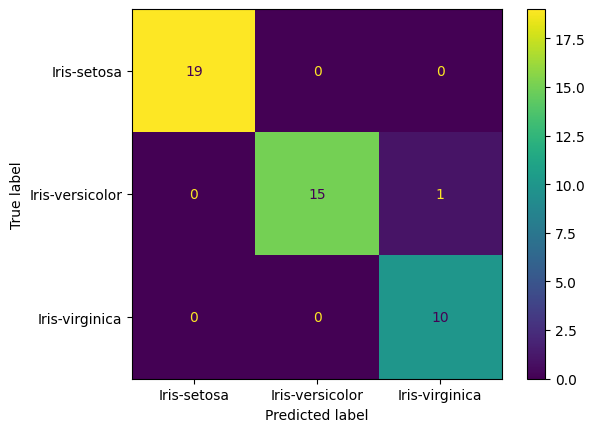

In [29]:
matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

cm_display.plot()
plt.show()

### Decision Tree

In [30]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
 
predicted_value = model.predict(X_test)
acc = accuracy_score(predicted_value, y_test)
tree_acc.append(acc)
print(f'Accuracy using Decision Tree: {acc}')

Accuracy using Decision Tree: 0.9555555555555556


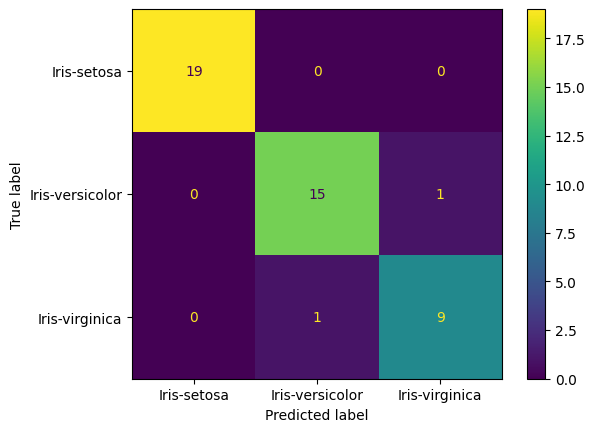

In [32]:
tree_matrix = metrics.confusion_matrix(y_test, predicted_value)
tree_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = tree_matrix, display_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

tree_cm_display.plot()
plt.show()

### K-Fold Cross Validation

In [ ]:
final_acc = 0
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = GaussianNB()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final_acc += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final_acc / 10}')

In [ ]:
final = 0
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = tree.DecisionTreeClassifier()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final / 10}')

### Bagging Classifier

In [36]:
bagging = BaggingClassifier(base_estimator = gnb, n_estimators = 5, max_samples = 50, bootstrap = True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')

Train score: 0.9481481481481482
Test score: 1.0


c:\Users\Meet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [38]:
bagging = BaggingClassifier(base_estimator = model, n_estimators = 5, max_samples = 50, bootstrap = True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')

Train score: 0.9555555555555556
Test score: 1.0


c:\Users\Meet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### Boosting - Adaboost Classifier

In [39]:
adaboost = AdaBoostClassifier(base_estimator = gnb, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

Train score: 0.9555555555555556
Test score: 1.0


c:\Users\Meet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [40]:
adaboost = AdaBoostClassifier(base_estimator = model, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

Train score: 1.0
Test score: 1.0


c:\Users\Meet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### Random Forest Classifier

In [41]:
clf = RandomForestClassifier(n_estimators = 100, max_features = "auto", random_state = 4627)
clf.fit(X_train, y_train)
print(f"Train score: {clf.score(X_train, y_train)}")
print(f"Test score: {clf.score(X_test, y_test)}")

Train score: 1.0
Test score: 1.0


c:\Users\Meet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


# Stars Dataset

### Pre-processing

In [ ]:
dataset.append('Stars')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Star3642_balanced.csv')

In [ ]:
df.head(10)

In [ ]:
df.size

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
for i in df.columns:
  print(i)

In [ ]:
df.drop('SpType', axis = 1)

In [ ]:
X = pd.DataFrame(df, columns = ['Vmag', 'Plx', 'e_Plx', 'B-V', 'Amag'])
X.head()

In [ ]:
y = df['TargetClass'].to_numpy()
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10242)

### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_pred, y_test)
gnb_acc.append(acc)
print(f'Accuracy using Gaussian Naive Bayes: {acc}')

In [ ]:
matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['0', '1'])

cm_display.plot()
plt.show()

In [ ]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "Data 1, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

In [ ]:
scores = []

### Decision Tree

In [ ]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
 
predicted_value = model.predict(X_test)
acc = accuracy_score(predicted_value, y_test)
scores.append(acc)
tree_acc.append(acc)
print(f'Accuracy using Decision Tree: {acc}')

In [ ]:
tree_matrix = metrics.confusion_matrix(y_test, y_pred)
tree_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = tree_matrix, display_labels = ['0', '1'])

tree_cm_display.plot()
plt.show()

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "Data 1, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

### K-Fold Cross Validation

In [ ]:
final_acc = 0
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = GaussianNB()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final_acc += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['0', '1'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final_acc / 10}')

In [ ]:
final = 0
k_folds = KFold(n_splits = 5, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = tree.DecisionTreeClassifier()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['0', '1'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final / 5}')
scores.append(final/ 5)

### Bagging Classifier

In [ ]:
bagging = BaggingClassifier(base_estimator = gnb, n_estimators = 5, max_samples = 50, bootstrap = True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')

In [ ]:
bagging = BaggingClassifier(base_estimator = model, n_estimators = 5, max_samples = 50, bootstrap = True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')
scores.append(bagging.score(X_test, y_test))

### Boosting - Adaboost Classifier

In [ ]:
adaboost = AdaBoostClassifier(base_estimator = gnb, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

In [ ]:
adaboost = AdaBoostClassifier(base_estimator = model, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")
scores.append(adaboost.score(X_test, y_test))

### Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(n_estimators = 100, max_features = "auto", random_state = 4627)
clf.fit(X_train, y_train)
print(f"Train score: {clf.score(X_train, y_train)}")
print(f"Test score: {clf.score(X_test, y_test)}")
scores.append(clf.score(X_test, y_test))

In [ ]:
all_data = {'Classifier': ['Decision Treee', 'K-Fold', 'Bagging Classifier', 'Adaboost', 'Random Forest'],
            'Accuracy': scores}
print(tabulate(all_data, tablefmt = 'grid'))

# Heart Dataset

### Pre-processing

In [ ]:
dataset.append('Heart Attack')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
df.head(10)

In [ ]:
df.size

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.info

In [ ]:
for i in df.columns:
  print(i)

In [ ]:
X = pd.DataFrame(df, columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall'])
X.head()

In [ ]:
y = df['output'].to_numpy()
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10242)

### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_pred, y_test)
gnb_acc.append(acc)
print(f'Accuracy using Gaussian Naive Bayes: {acc}')

In [ ]:
matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['0', '1'])

cm_display.plot()
plt.show()

In [ ]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "Data 1, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

### Decision Tree

In [ ]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
 
predicted_value = model.predict(X_test)
acc = accuracy_score(predicted_value, y_test)
tree_acc.append(acc)
print(f'Accuracy using Decision Tree: {acc}')

In [ ]:
tree_matrix = metrics.confusion_matrix(y_test, y_pred)
tree_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = tree_matrix, display_labels = ['0', '1'])

tree_cm_display.plot()
plt.show()

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "Data 1, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

### K-Fold Cross Validation

In [ ]:
final_acc = 0
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = GaussianNB()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final_acc += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['0', '1'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final_acc / 10}')

In [ ]:
final = 0
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = tree.DecisionTreeClassifier()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['0', '1'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final / 10}')

### Bagging Classifier

In [ ]:
bagging = BaggingClassifier(base_estimator = gnb, n_estimators = 5, max_samples = 50, bootstrap = True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')

In [ ]:
bagging = BaggingClassifier(base_estimator = model, n_estimators = 5, max_samples = 50, bootstrap = True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')

### Boosting - Adaboost Classifier

In [ ]:
adaboost = AdaBoostClassifier(base_estimator = gnb, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

In [ ]:
adaboost = AdaBoostClassifier(base_estimator = model, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

### Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(n_estimators = 100, max_features = "auto", random_state = 4627)
clf.fit(X_train, y_train)
print(f"Train score: {clf.score(X_train, y_train)}")
print(f"Test score: {clf.score(X_test, y_test)}")

# Mushroom Dataset

### Pre-processing

In [ ]:
dataset.append('Mushroom')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mushrooms.csv')

In [ ]:
df.head(10)

In [ ]:
df.size

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.info

In [ ]:
for i in df.columns:
  print(i)

In [ ]:
for i in df.columns:
  print(df[i].unique())

In [ ]:
df.replace({'cap-shape': {'x': 0, 'b': 1, 's': 2, 'f': 3, 'k': 4, 'c': 5}, 
            'cap-surface': {'s': 0, 'y': 1, 'f': 2, 'g': 3}, 
            'cap-color': {'n': 0, 'y': 1, 'w': 2, 'g': 3, 'e': 4, 'p': 5, 'b': 6, 'u': 7, 'c': 8, 'r': 9},
            'bruises': {'t': 0, 'f': 1},
            'odor': {'p': 0, 'a': 1, 'l': 2, 'n': 3, 'f': 4, 'c': 5, 'y': 6, 's': 7, 'm': 8},
            'gill-attachment': {'f': 0, 'a': 1},
            'gill-spacing': {'c': 0, 'w': 1},
            'gill-size': {'n': 0, 'b': 1},
            'gill-color': {'k': 0, 'n': 1, 'g': 2, 'p': 3, 'w': 4, 'h': 5, 'u': 6, 'e': 7, 'b': 8, 'r': 9, 'y': 10, 'o': 11},
            'stalk-shape': {'e': 0, 't': 1},
            'stalk-root': {'e': 0, 'c': 1, 'b': 2, 'r': 3, '?': 4},
            'stalk-surface-above-ring': {'s': 0, 'f': 1, 'k': 2, 'y': 3},
            'stalk-surface-below-ring': {'s': 0, 'f': 1, 'k': 2, 'y': 3},
            'stalk-color-above-ring': {'w': 0, 'g': 1, 'p': 2, 'n': 3, 'b': 4, 'e': 5, 'o': 6, 'c': 7, 'y': 8},
            'stalk-color-below-ring': {'w': 0, 'g': 1, 'p': 2, 'n': 3, 'b': 4, 'e': 5, 'o': 6, 'c': 7, 'y': 8},
            'veil-type': {'p': 0},
            'veil-color': {'w': 0, 'n': 1, 'o': 2, 'y': 3},
            'ring-number': {'o': 0, 't': 1, 'n': 2},
            'ring-type': {'p': 0, 'e': 1, 'l': 2, 'f': 3, 'n': 4},
            'spore-print-color': {'k': 0, 'n': 1, 'u': 2, 'h': 3, 'w': 4, 'r': 5, 'o': 6, 'y': 7, 'b': 8},
            'population': {'s': 0, 'n': 1, 'a': 2, 'v': 3, 'y': 4, 'c': 5},
            'habitat': {'u': 0, 'g': 1, 'm': 2, 'd': 3, 'p': 4, 'w': 5, 'l': 6},
            'class': {'p': 0, 'e': 1}
            }, inplace = True)

In [ ]:
df.head()

In [ ]:
X = pd.DataFrame(df, columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'])
X.head()

In [ ]:
y = df['class'].to_numpy()
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10242)

### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_pred, y_test)
gnb_acc.append(acc)
print(f'Accuracy using Gaussian Naive Bayes: {acc}')

In [ ]:
matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['p', 'e'])

cm_display.plot()
plt.show()

In [ ]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "Data 1, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

### Decision Tree

In [ ]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
 
predicted_value = model.predict(X_test)
acc = accuracy_score(predicted_value, y_test)
tree_acc.append(acc)
print(f'Accuracy using Decision Tree: {acc}')

In [ ]:
tree_matrix = metrics.confusion_matrix(y_test, y_pred)
tree_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = tree_matrix, display_labels = ['p', 'e'])

tree_cm_display.plot()
plt.show()

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "Data 1, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

### K-Fold Cross Validation

In [ ]:
final_acc = 0
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = GaussianNB()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final_acc += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['p', 'e'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final_acc / 10}')

In [ ]:
final = 0
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = tree.DecisionTreeClassifier()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['p', 'e'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final / 10}')

### Bagging Classifier

In [ ]:
bagging = BaggingClassifier(base_estimator = gnb, n_estimators = 5, max_samples = 50, bootstrap = True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')

In [ ]:
bagging = BaggingClassifier(base_estimator = model, n_estimators = 5, max_samples = 50, bootstrap = True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')

### Boosting - Adaboost Classifier

In [ ]:
adaboost = AdaBoostClassifier(base_estimator = gnb, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

In [ ]:
adaboost = AdaBoostClassifier(base_estimator = model, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

### Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(n_estimators = 100, max_features = "auto", random_state = 4627)
clf.fit(X_train, y_train)
print(f"Train score: {clf.score(X_train, y_train)}")
print(f"Test score: {clf.score(X_test, y_test)}")

# Customer Dataset

### Pre-processing

In [ ]:
dataset.append('Customer')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Customer_Behaviour.csv')

In [ ]:
df.head(10)

In [ ]:
df.size

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.info

In [ ]:
for i in df.columns:
  print(i)

In [ ]:
df.drop('User ID', axis = 1)

In [ ]:
df.replace(to_replace = 'Male', value = 0, inplace = True)
df.replace(to_replace =  'Female', value = 1, inplace = True)

In [ ]:
X = pd.DataFrame(df, columns = ['Gender', 'Age', 'EstimatedSalary'])
X.head()

In [ ]:
y = df['Purchased'].to_numpy()
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10242)

### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_pred, y_test)
gnb_acc.append(acc)
print(f'Accuracy using Gaussian Naive Bayes: {acc}')

In [ ]:
matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['0', '1'])

cm_display.plot()
plt.show()

In [ ]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "Data 1, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

### Decision Tree

In [ ]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
 
predicted_value = model.predict(X_test)
acc = accuracy_score(predicted_value, y_test)
tree_acc.append(acc)
print(f'Accuracy using Decision Tree: {acc}')

In [ ]:
tree_matrix = metrics.confusion_matrix(y_test, y_pred)
tree_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = tree_matrix, display_labels = ['0', '1'])

tree_cm_display.plot()
plt.show()

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "Data 1, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

### K-Fold Cross Validation

In [ ]:
final_acc = 0
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = GaussianNB()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final_acc += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['0', '1'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final_acc / 10}')

In [ ]:
final = 0
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = tree.DecisionTreeClassifier()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['0', '1'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final / 10}')

### Bagging Classifier

In [ ]:
bagging = BaggingClassifier(base_estimator = gnb, n_estimators = 5, max_samples = 50, bootstrap=True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')

In [ ]:
bagging = BaggingClassifier(base_estimator = model, n_estimators = 5, max_samples = 50, bootstrap=True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')

### Boosting - Adaboost Classifier

In [ ]:
adaboost = AdaBoostClassifier(base_estimator = gnb, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

In [ ]:
adaboost = AdaBoostClassifier(base_estimator = model, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

## Comparison of Dataset Accuracies

In [ ]:
N = 3
ind = np.arange(len(dataset[::1]))
width = 0.3

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, gnb_acc, width, color = 'r')
rects2 = ax.bar(ind+width, tree_acc, width, color = 'g')

ax.set_ylabel('Accuracy')
ax.set_xlabel('Dataset')
ax.set_xticks(ind + width - 0.155)
ax.set_xticklabels(dataset)
ax.legend((rects1[0], rects2[0]), ('Gaussian Naive Bayes', 'Decision Tree') )

ax.set_title('Accuracies in Different Dataset')
fig.set_figwidth(10)
fig.set_figheight(6)

plt.show()